In [3]:
curr_dir = '/user_data/vayzenbe/GitHub_Repos/hemispace'

import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import pandas as pd

import itertools
from nilearn import image, plotting, datasets, masking
import nibabel as nib
import pdb
import os
import hemispace_params as params
from glob import glob as glob

In [2]:
data_dir = params.data_dir
results_dir = params.results_dir

sub_info = params.sub_info
task_info = pd.read_csv(f'{curr_dir}/task_info_fix.csv')

suf = params.suf
thresh = params.thresh
rois = params.rois

runs = params.runs

In [6]:
#loop through subs and print how many runs they have of eac hcondition
for sub, group in zip(sub_info['sub'],sub_info['group']) :
    sub_dir = f'{data_dir}/{sub}/ses-01/derivatives/fsl'
    for task in task_info['task']:
        task_dir = f'{sub_dir}/{task}'

        #count number of run folders in task folder
        folders = len(glob(f'{task_dir}/run*'))

        #if folders is not none then print how many runs there are
        print(f'{sub} {group} has {folders} runs of {task}')
        


sub-hemispace2001 control has 3 runs of spaceloc
sub-hemispace2001 control has 3 runs of spaceloc
sub-hemispace2001 control has 3 runs of toolloc
sub-hemispace2001 control has 3 runs of toolloc
sub-hemispace2001 control has 3 runs of loc
sub-hemispace2001 control has 3 runs of loc
sub-hemispace2001 control has 3 runs of loc
sub-hemispace2002 control has 3 runs of spaceloc
sub-hemispace2002 control has 3 runs of spaceloc
sub-hemispace2002 control has 3 runs of toolloc
sub-hemispace2002 control has 3 runs of toolloc
sub-hemispace2002 control has 3 runs of loc
sub-hemispace2002 control has 3 runs of loc
sub-hemispace2002 control has 3 runs of loc
sub-hemispace2003 control has 3 runs of spaceloc
sub-hemispace2003 control has 3 runs of spaceloc
sub-hemispace2003 control has 3 runs of toolloc
sub-hemispace2003 control has 3 runs of toolloc
sub-hemispace2003 control has 3 runs of loc
sub-hemispace2003 control has 3 runs of loc
sub-hemispace2003 control has 3 runs of loc
sub-103 control has 3 

In [8]:
#loop through mvpa data nad check shape

for sub in sub_info['sub']:
    mvpa_dir = f'{data_dir}/{sub}/ses-01/derivatives/mvpa'

    for hemi in ['left','right']:
        for roi in rois:
            for task,cond in zip(task_info['task'], task_info['cond']):
                #check if mvpa file exists
                if os.path.exists(f'{mvpa_dir}/{hemi}_{roi}_{task}_{cond}.npy'):
                    #load mvpa file
                    mvpa = np.load(f'{mvpa_dir}/{hemi}_{roi}_{task}_{cond}.npy')

                    print(sub, hemi, roi, task, cond, mvpa.shape)

                
                    


sub-hemispace1001 right dorsal_visual_cortex spaceloc space (10, 13511)
sub-hemispace1001 right dorsal_visual_cortex spaceloc feat (10, 13511)
sub-hemispace1001 right dorsal_visual_cortex loc object (6, 13511)
sub-hemispace1001 right dorsal_visual_cortex loc face (6, 13511)
sub-hemispace1001 right dorsal_visual_cortex loc word (6, 13511)
sub-hemispace1001 right ventral_visual_cortex spaceloc space (10, 6673)
sub-hemispace1001 right ventral_visual_cortex spaceloc feat (10, 6673)
sub-hemispace1001 right ventral_visual_cortex loc object (6, 6673)
sub-hemispace1001 right ventral_visual_cortex loc face (6, 6673)
sub-hemispace1001 right ventral_visual_cortex loc word (6, 6673)
sub-hemispace1002 left dorsal_visual_cortex spaceloc space (10, 56633)
sub-hemispace1002 left dorsal_visual_cortex spaceloc feat (10, 56633)
sub-hemispace1002 left dorsal_visual_cortex toolloc tool (10, 56633)
sub-hemispace1002 left dorsal_visual_cortex toolloc non_tool (10, 56633)
sub-hemispace1002 left dorsal_visual_

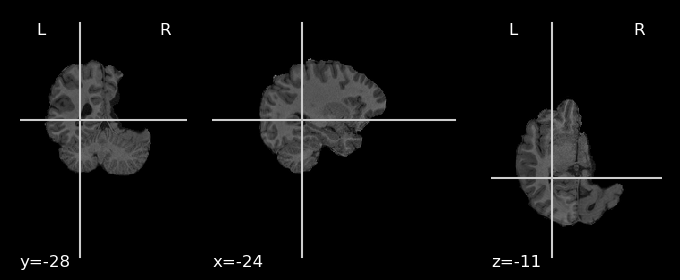

In [7]:
#load anatomy for sub 108
anat = nib.load(f'{data_dir}/sub-109/ses-01/anat/sub-109_ses-01_T1w_brain.nii.gz')

plotting.plot_anat(anat)


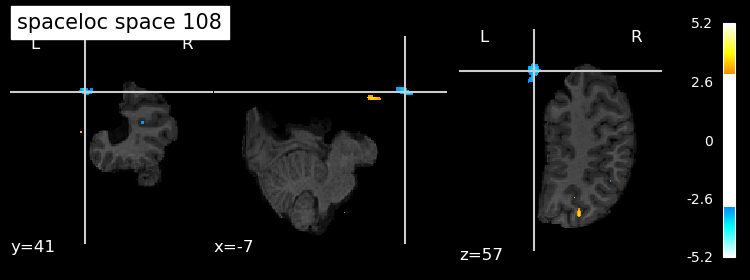

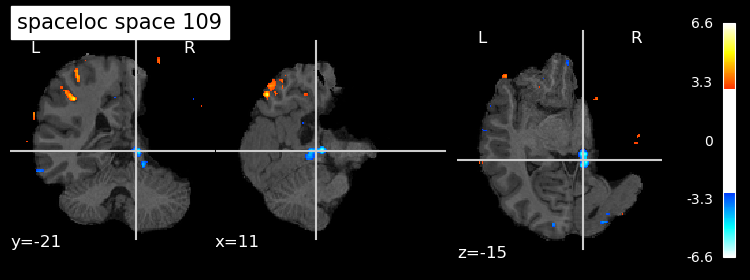

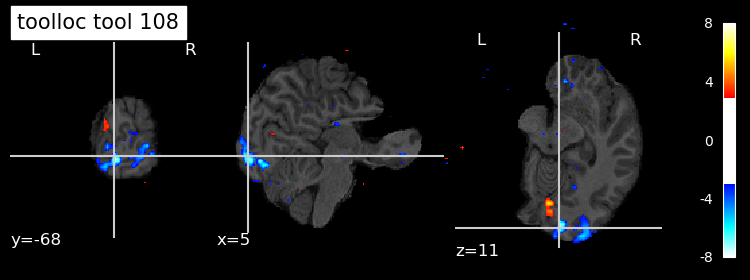

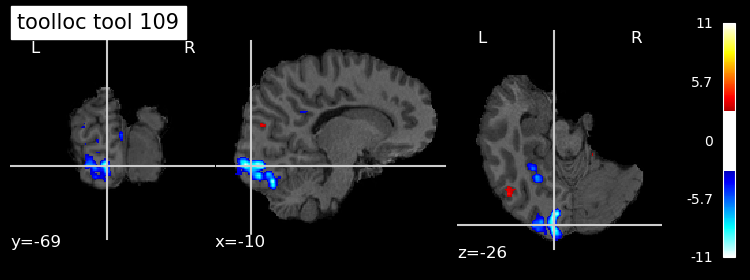

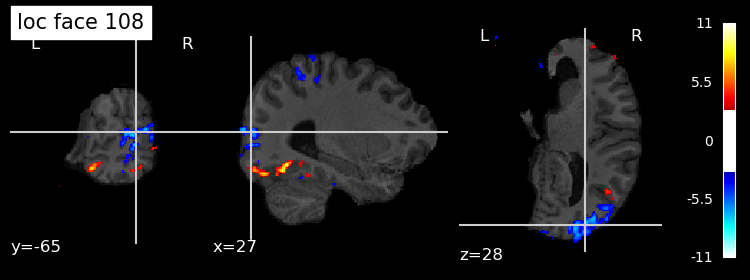

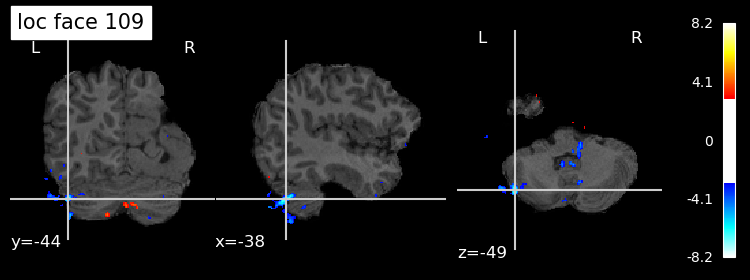

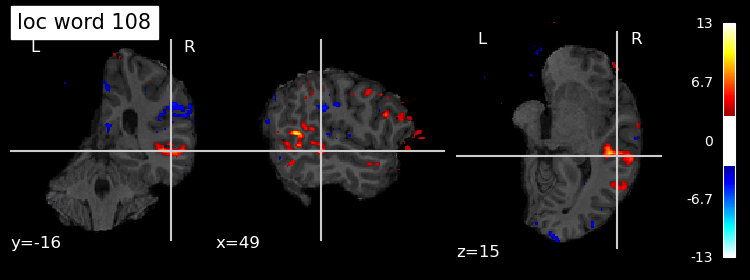

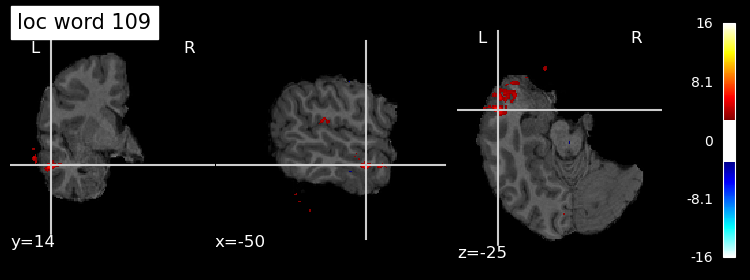

In [9]:
"""
Check  funcs for all subs
"""

for task in tasks:
    for cond_ind, cond in enumerate(conds[tasks.index(task)]):
        for sub in sub_info['sub']:

            if sub[0:4] =='sub-':
                sub = sub[4:]
            #check if task folder exists
            if os.path.exists(f'{data_dir}/sub-{sub}/ses-01/derivatives/fsl/{task}'):
            
                anat_file = f'{data_dir}/sub-{sub}/ses-01/anat/sub-{sub}_ses-01_T1w_brain.nii.gz'
                stat_file = f'{data_dir}/sub-{sub}/ses-01/derivatives/fsl/{task}/HighLevel.gfeat/cope{copes[tasks.index(task)][cond_ind]}.feat/stats/zstat1.nii.gz'
                plotting.plot_stat_map(stat_file, bg_img=anat_file, threshold=2.95, title=f'{task} {cond} {sub}')
                #save figure
                plt.savefig(f'{curr_dir}/qc/{sub}_{task}_{cond}.jpg')
                
                plt.pause(.001)

                    
                
            else:
                print(f'{task} folder does not exist for {sub}')
                


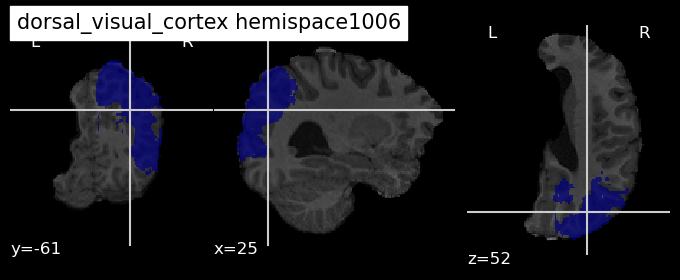

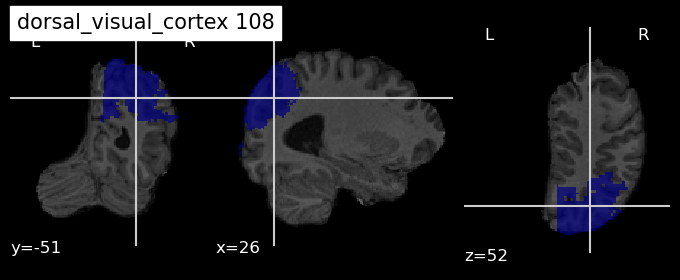

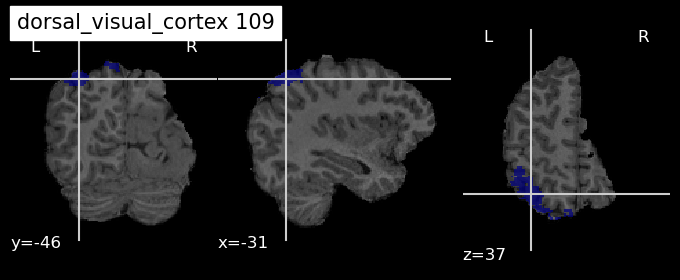

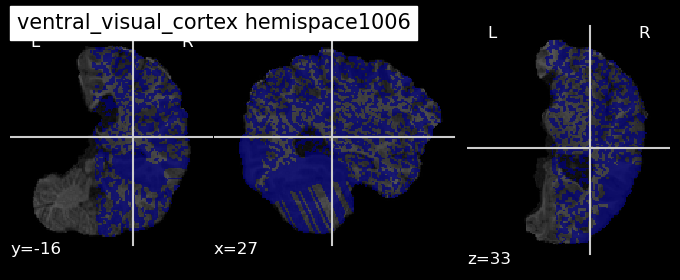

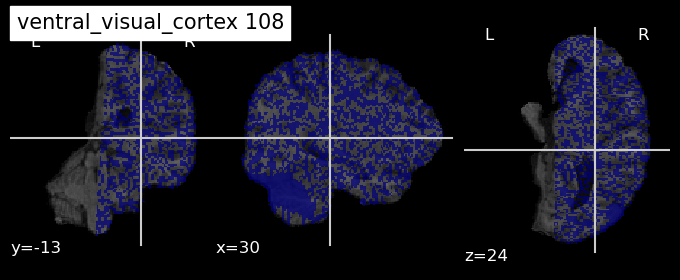

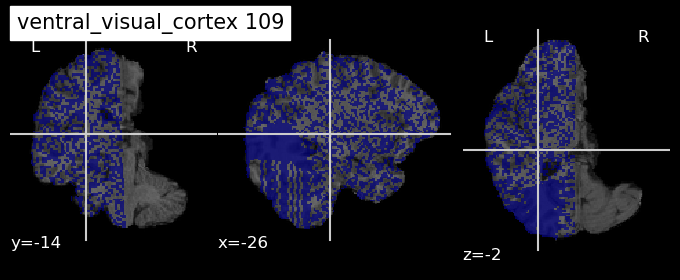

In [16]:
"""Visualize Dorsal and ventral rois on subs"""


for roi in rois:
    for sub,hemi in zip(sub_info['sub'],sub_info['intact_hemi']):
        if sub[0:4] =='sub-':
            sub = sub[4:]

        if hemi == 'right':
            anat_mask = image.load_img(f'{data_dir}/sub-{sub}/ses-01/anat/sub-{sub}_ses-01_T1w_brain_mask_right.nii.gz')
        elif hemi == 'left':
            anat_mask = image.load_img(f'{data_dir}/sub-{sub}/ses-01/anat/sub-{sub}_ses-01_T1w_brain_mask_left.nii.gz')
        else:
            anat_mask = image.load_img(f'{data_dir}/sub-{sub}/ses-01/anat/sub-{sub}_ses-01_T1w_brain_mask_right.nii.gz')

        #anat_mask =image.get_data(anat_mask)
        anat_file = image.load_img(f'{data_dir}/sub-{sub}/ses-01/anat/sub-{sub}_ses-01_T1w_brain.nii.gz')
        #stat_file = image.get_data(image.load_img(f'{data_dir}/sub-{sub}/ses-01/derivatives/fsl/{task}/HighLevel.gfeat/cope{copes[tasks.index(task)][cond_ind]}.feat/stats/zstat1.nii.gz'))
        parcel_file = image.binarize_img(image.load_img(f'{data_dir}/sub-{sub}/ses-01/derivatives/rois/parcels/{roi}.nii.gz'), threshold =.5, mask_img = anat_mask)

        #affine = anat_file.affine

        #parcel_file = anat_mask * parcel_file

        #parcel_file = nib.Nifti1Image(parcel_file, affine)

        #parcel_file = image.binarize_img(parcel_file)

        plotting.plot_roi(parcel_file, bg_img=anat_file, title=f'{roi} {sub}')
        plt.savefig(f'{curr_dir}/qc/{sub}_{roi}.jpg')
        plt.pause(.001)



In [14]:
sub = 109
anat_mask = image.load_img(f'{data_dir}/sub-{sub}/ses-01/anat/sub-{sub}_ses-01_T1w_brain_mask_right.nii.gz')
parcel_file = image.load_img(f'{data_dir}/sub-{sub}/ses-01/derivatives/rois/parcels/{roi}.nii.gz')
parcel_file = image.binarize_img(parcel_file,threshold=0)
plotting.plot_roi(parcel_file, bg_img=anat_file, title=f'{roi} {sub}')


ValueError: File not found: '/lab_data/behrmannlab/vlad/hemispace/sub-109/ses-01/anat/sub-109_ses-01_T1w_brain_mask_right.nii.gz'


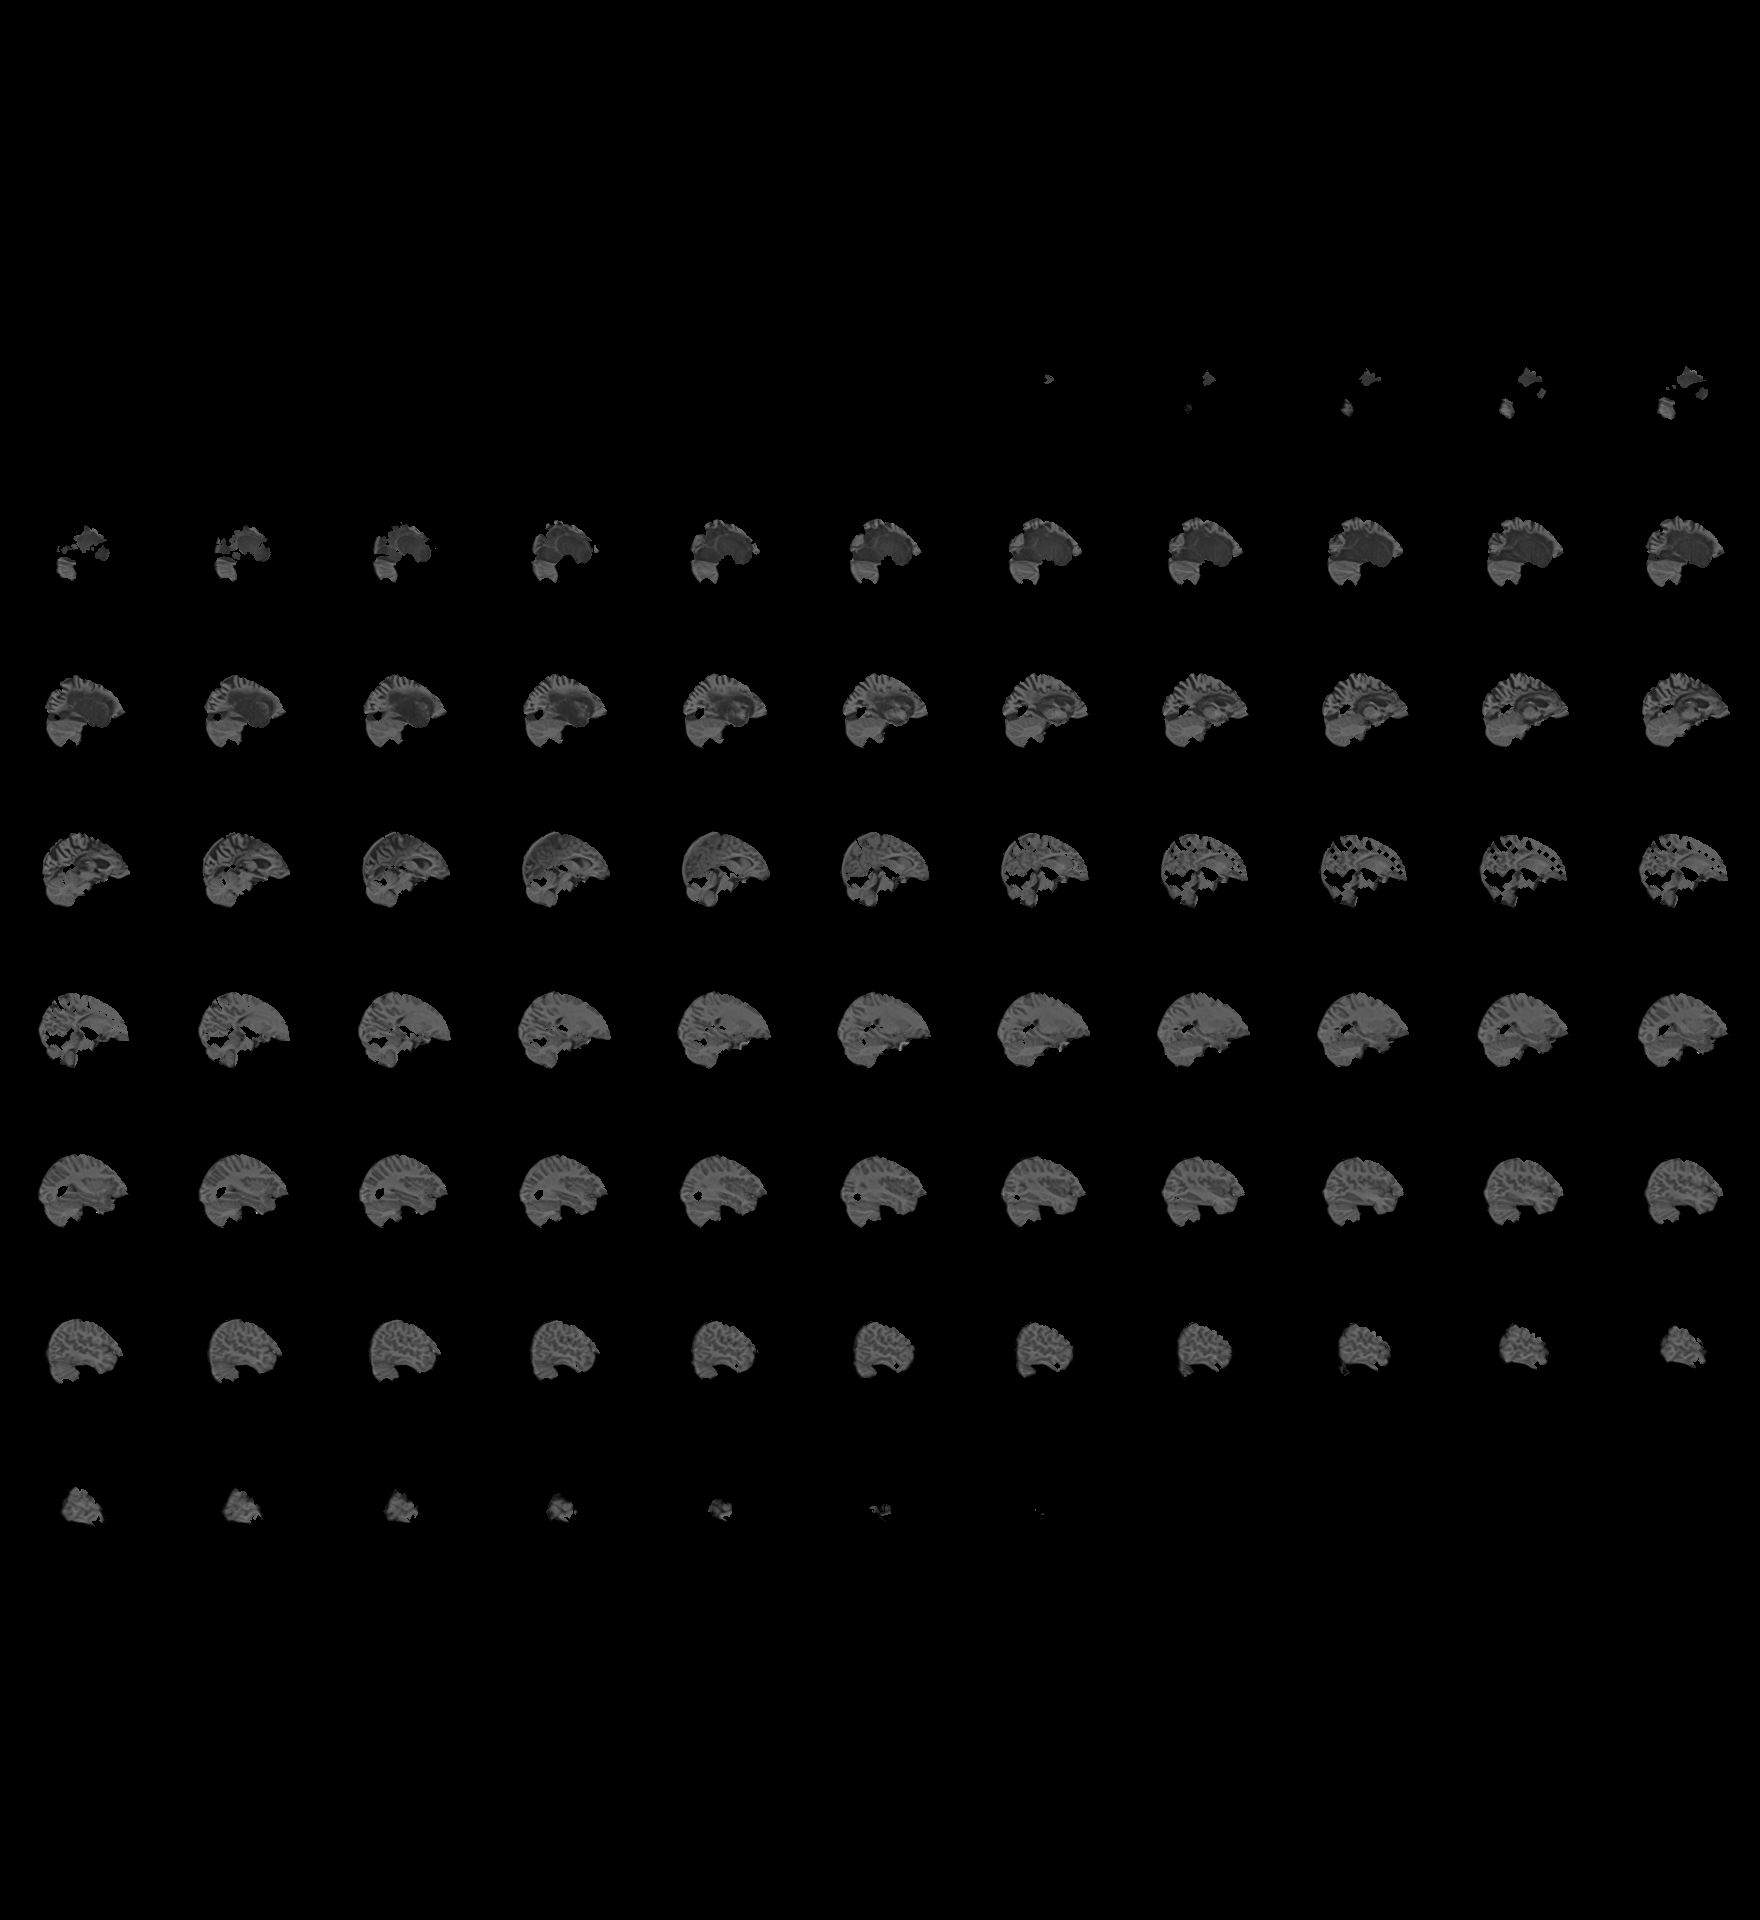
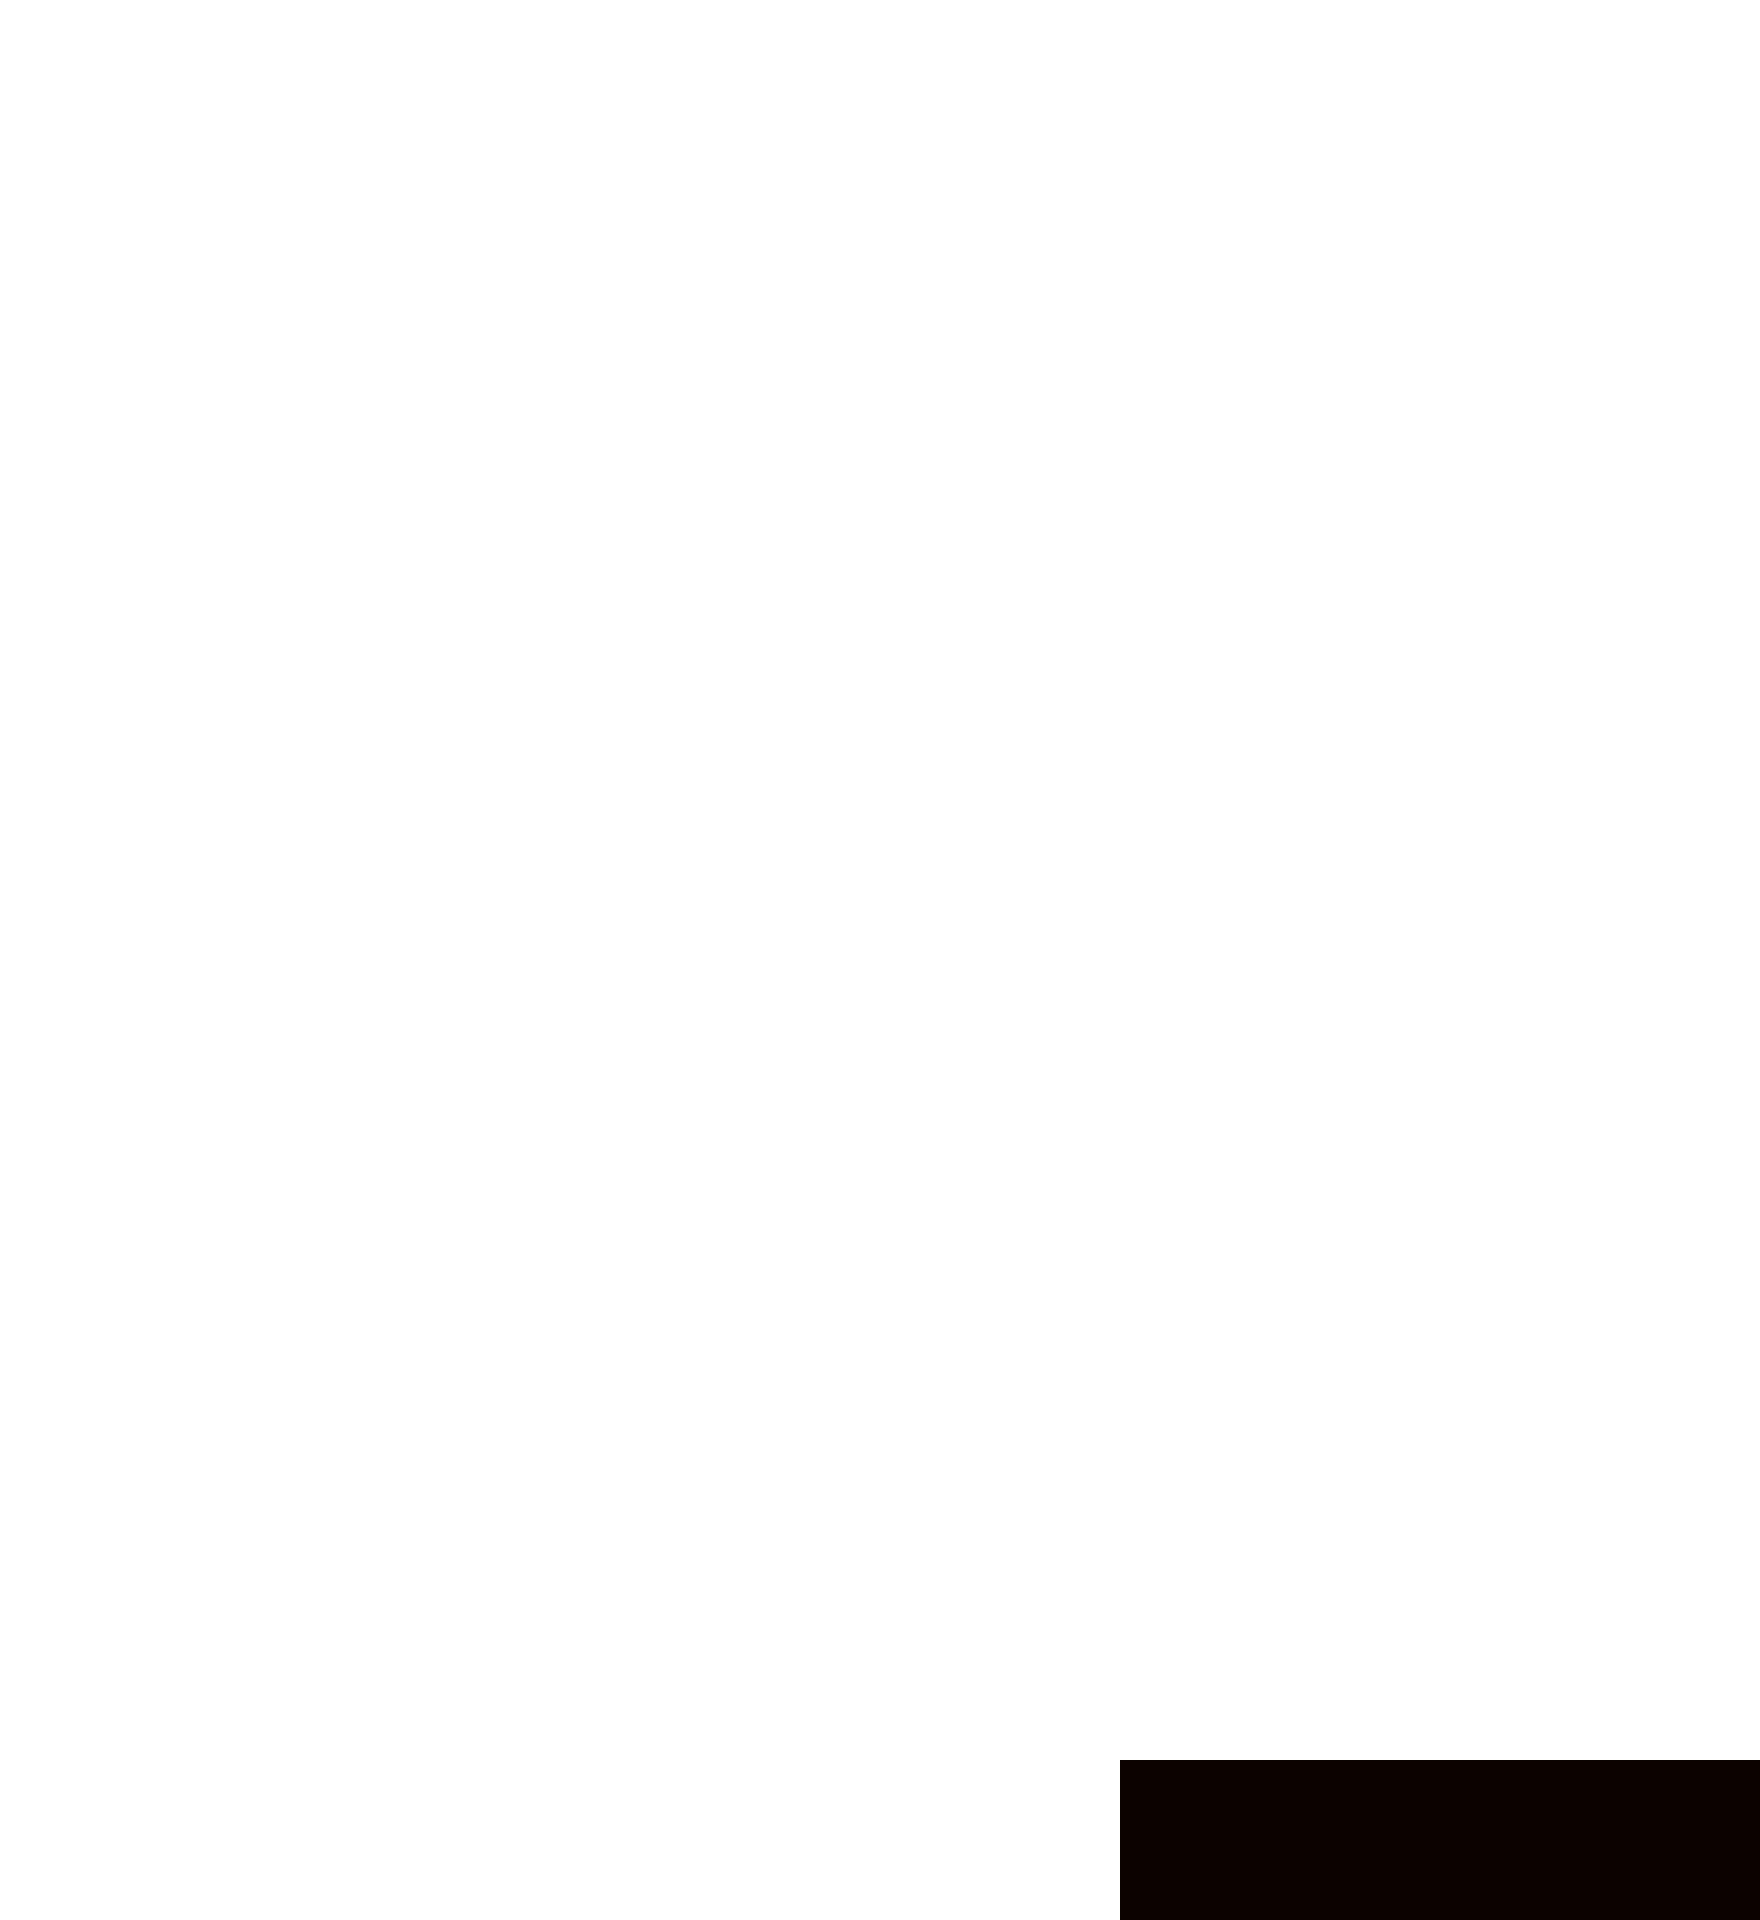

In [17]:
parcel_file = image.binarize_img(parcel_file,threshold=0)
plotting.view_img(parcel_file, bg_img=anat_file, title=f'{roi} {sub}')

In [19]:
sub

'hemispace1001'